In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [ ]:
df = pd.read_csv('/content/Training/train.csv')
df['race']=df['race'].replace(np.nan,'Unknown')
df.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptoms,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x204,7,Male,60-64,Unknown,2010,81403,2016.0,34,2,2,Dry eye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,5,Calm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,4,Allergies,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,3,Gabapentin,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,2,Obsessive-compulsive disorder,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


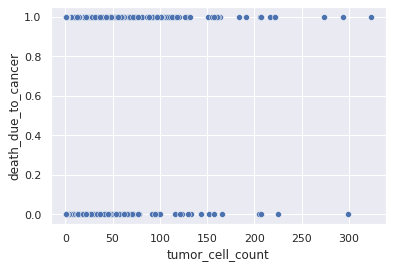

In [ ]:
sns.scatterplot(x=df['tumor_cell_count'],
                y=df['death_due_to_cancer'])

plt.savefig('scatterplot.png')

In [ ]:
def race_encoding(df):
  #label encoding for race
  df['race'].unique()
  from sklearn import preprocessing

  # label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()
 
  # Encode labels in column 'species'.
  df['race']=df['race'].dropna()
  df['race']= label_encoder.fit_transform(df['race'])
 
  df['race'].unique()

In [ ]:
def symptoms_encoding(df):
  #Label encoding for Symptoms
  df['symptoms']=df['symptoms'].replace(np.nan,'Unknown')
  # label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()
  
  # Encode labels in column 'species'.
  df['symptoms']=df['symptoms'].dropna()
  df['symptoms']= label_encoder.fit_transform(df['symptoms'])
  df['symptoms'].unique()

In [ ]:
def gender_encoding(df):
  #Label encoding for Gender
  df['gender']=df['gender'].replace(np.nan,'Unknown')
  # label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()
  
  # Encode labels in column 'species'.
  df['gender']=df['gender'].dropna()
  df['gender']= label_encoder.fit_transform(df['gender'])
  df['gender'].unique()

In [ ]:
def age_group_encoding(df):
  #Label encoding for Age Group
  df['age_group']=df['age_group'].replace(np.nan,'Unknown')
  # label_encoder object knows how to understand word labels.
  label_encoder = preprocessing.LabelEncoder()
  
  # Encode labels in column 'species'.
  df['age_group']=df['age_group'].dropna()
  df['age_group']= label_encoder.fit_transform(df['age_group'])
  df['age_group'].unique()

In [ ]:
symptoms_encoding(df)
gender_encoding(df)
age_group_encoding(df)
race_encoding(df)

In [ ]:
x = df.drop(['patient_id','death_due_to_cancer'], axis=1)
y = df['death_due_to_cancer']

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sm = MinMaxScaler()
x_train_scaled = sm.fit_transform(x_train)
x_test_scaled = sm.fit_transform(x_test)

In [ ]:
model=CatBoostClassifier(iterations=30)
model.fit(x_train,y_train)

Learning rate set to 0.360417
0:	learn: 0.5002326	total: 4.35ms	remaining: 126ms
1:	learn: 0.4489709	total: 6.58ms	remaining: 92.1ms
2:	learn: 0.3961759	total: 8.87ms	remaining: 79.8ms
3:	learn: 0.3728414	total: 11.4ms	remaining: 73.9ms
4:	learn: 0.3632319	total: 13.5ms	remaining: 67.6ms
5:	learn: 0.3496241	total: 15.7ms	remaining: 62.8ms
6:	learn: 0.3407247	total: 17.9ms	remaining: 58.7ms
7:	learn: 0.3359172	total: 20ms	remaining: 54.9ms
8:	learn: 0.3291297	total: 22ms	remaining: 51.3ms
9:	learn: 0.3233644	total: 24.1ms	remaining: 48.1ms
10:	learn: 0.3157234	total: 26.1ms	remaining: 45.1ms
11:	learn: 0.3069223	total: 28.1ms	remaining: 42.2ms
12:	learn: 0.3008338	total: 30.1ms	remaining: 39.4ms
13:	learn: 0.2952445	total: 32.2ms	remaining: 36.8ms
14:	learn: 0.2904793	total: 34.2ms	remaining: 34.2ms
15:	learn: 0.2858525	total: 36.3ms	remaining: 31.7ms
16:	learn: 0.2830456	total: 38.3ms	remaining: 29.3ms
17:	learn: 0.2762981	total: 42.8ms	remaining: 28.5ms
18:	learn: 0.2704926	total: 45.

In [ ]:
predictions=model.predict(x_test)
predictions

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
model.score(x,y)

0.893970189701897

In [ ]:
#Reading test.csv
df_test=pd.read_csv('/content/test.csv')
df_test['race']=df_test['race'].replace(np.nan,'Unknown')
symptoms_encoding(df_test)
gender_encoding(df_test)
age_group_encoding(df_test)
race_encoding(df_test)
df.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptoms,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x204,7,1,5,5,2010,81403,2016.0,34,2,2,116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x1063,1,1,10,6,2012,80463,2016.0,4,7,5,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,0,7,6,2013,80103,2018.0,20,1,4,12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,0,6,6,2013,80463,2018.0,20,5,3,148,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,1,3,6,2010,80463,2016.0,20,5,2,260,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
x = df_test.drop(['patient_id'], axis=1)

In [ ]:
predictions=model.predict(x)
df_test=df_test.assign(death_due_to_cancer=predictions)
df_test

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,alcohol_consume_units,symptoms,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,symptom9,symptom10,symptom11,symptom12,symptom13,symptom14,symptom15,symptom16,symptom17,symptom18,symptom19,symptom20,symptom21,symptom22,symptom23,symptom24,symptom25,symptom26,symptom27,symptom28,symptom29,symptom30,symptom31,symptom32,symptom33,symptom34,symptom35,symptom36,symptom37,symptom38,symptom39,symptom40,symptom50,symptom51,symptom52,symptom53,symptom54,symptom55,symptom56,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x7e9,1,1,10,6,2009,80003,2014.0,25,4,4,146,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x6bc,1,1,9,6,2013,82503,2020.0,12,8,3,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0x1195,1,1,5,6,2013,80703,2017.0,3,5,6,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0x8a5,1,1,10,6,2013,80103,2018.0,20,5,0,87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xa21,1,1,10,6,2009,80003,NaN,25,2,8,214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,TCBA-B8-0xc5f,1,0,7,6,2010,82503,2019.0,15,4,6,245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1965,TCBA-B8-0x267,1,1,8,6,2010,81403,2016.0,3,2,3,79,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1966,TCBA-B8-0xce9,1,0,9,6,2013,81403,2018.0,10,8,6,285,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1967,TCBA-B8-0xc20,1,0,3,4,2013,80463,2018.0,10,6,2,245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df_test = df_test[['patient_id','death_due_to_cancer']]
df_test.head()
len(df_test)

1969

In [ ]:
df_test.to_csv('output.csv')